<b>Приветствую!</b> Это моё второе исследование

Чтобы его провести, я буду использовать функционал Питона и его библиотек - Matplotlib, pandas, numpy,scipy,seaborn. Файл all_analytic_modules с подключенными библиотеками и методами статистики (дисперсии, T-тесты, визуализация и тд) поможет в моих исследованиях

Ниже егое код, для наглядности работы:

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns


def mediana(sample):
    return sample.median()


def moda(sample):
    return sample.mode()


def avarage(sample):
    """
    Mean of Data
    """
    return sample.mean()


def razmah(sample):
    return max(sample) - min(sample)


def D(sample):
    """
    dispersion
    """
    xsr = avarage(sample)
    cnt = 0
    for i in range(len(sample)):
        cnt += (xsr - sample[i]) ** 2
    return cnt / len(sample)


def sigma(sample):
    """
    standart deviation in general data
    """
    return D(sample) ** 0.5


def sd(sample):
    """
    standart deviation in nongeneral data
    """
    xsr = avarage(sample)
    cnt = 0
    for i in range(len(sample)):
        cnt += (xsr - sample[i]) ** 2
    d = cnt / (len(sample) - 1)
    return d ** 0.5


def se(sample):
    """
    standart deviation. We change of sd and sigma
    """
    if len(sample) > 30:
        return sd(sample) / len(sample) ** 0.5
    else:
        return sigma(sample) / len(sample) ** 0.5


def truerange():
    """
    confidence interval
    """
    print ('Введите стандартную ошибку (se):')
    srednee = float(input())
    print ('Введите вашe число:')
    x = float(input())
    print('Введите вашу последовательность в строку через пробел:')
    data = np.array(list(map(int, input().split())))
    xsr = sum(data) / len(data)
    print (('Доверительный интервал = [' , round(xsr - 1.96 * srednee, 4), ' ', round(xsr + 1.96 * srednee, 4), ']'))
    return (xsr - 1.96 * srednee, xsr + 1.96 * srednee)


def veroyatnost_of_one_value_general(sample):
    """
    probability of case in general data
    """
    print ('Покажет, какой процент людей обладает нужным параметром')
    mean = avarage(sample)
    std = se(sample)
    x = int(input( 'Введите значение' ))
    # sf - Survival function = (1 - cdf) - Cumulative distribution function
    return stats.norm(mean, std).sf(x) * 100


def t_veroyatnost_of_one_value():
    """
    probability of case in nongeneral data, len(data)<30
    """
    print ('Введите вашу последовательность в строку через пробел:')
    data = np.array(list(map(int, input().split())))
    print('Введите предполагаемое среднее значение генеральной совокупности:')
    u = float(input())
    xsr = sum(data) / len(data)
    df = len(data) - 1
    t = (xsr - u) / se(data)
    p = 2 * stats.t.sf(abs(t), df)
    return p


def t_test(sample1, sample2):
    """
    checking the equality of the means in two samples
    """
    sd1 = sd(sample1)
    sd2 = sd(sample2)
    SE = (sd1 ** 2 / len(sample1) + sd2 ** 2 / len(sample2)) ** 0.5
    xsr1 = avarage(sample1)
    xsr2 = avarage(sample2)
    T = (xsr1 - xsr2) / SE
    df = len(sample1) + len(sample2) - 2
    DF = \
        pd.DataFrame({'Выборка1': sample1,
                     'Выборка2': sample2}).agg(['mean'
            , 'std', 'count', 'sem']).transpose()
    DF.columns = ['Mx', 'SD', 'N', 'SE']
    K = stats.t.ppf(0.975, DF['Mx'] - 1)
    print (DF)
    p = stats.t.sf(T, df)
    print ('P-уровень значимости =',p)
    if p >= 0.05:
        print ('Мы не можем отклонить нулевую гипотезу')
    else:
        print ('Можем отклонить нулевую гипотезу')
    DF['interval'] = K * DF['SE']
    a = plt.boxplot([sample1, sample2], vert=True, patch_artist=True,
                    labels=['Выборка 1'
                    ,
                    'Выборка 2'
                    ])
    plt.show()
    b = plt.errorbar(
        x=['Выборка 1'
           ,
           'Выборка 2'
           ],
        y=DF['Mx'],
        yerr=DF['interval'],
        capsize=3,
        mfc='red',
        mec='black',
        fmt='o',
        )
    plt.show()
    return p


def histogramma(sample):
    plt.hist(sample, bins=np.arange(min(sample), max(sample) + 1, 1))
    plt.show()
    plt.hist(sample, bins=np.arange(min(sample), max(sample) + 1, 1),
             density=True)
    plt.show()


def Z_graph(sample):
    """
    Z-change of general data graphic
    """
    xsr = avarage(sample)
    zmassive = []
    for i in range(len(sample)):
        z_value_i = (sample[i] - xsr) / sd(sample)
        zmassive.append(z_value_i)
    sns.histplot(data=sample, kde=True)
    plt.show()
    return zmassive


def diagramma_boxplot(sample):
    plt.boxplot(sample, showfliers=1)
    plt.show()

def allavarage(sample):
    """
    one-way analysis of variance method to see mean of ALL data
    """
    n=sample.size
    cnt=0
    a=sample.sum()
    for i in a:
        cnt+=i
    return cnt/n

def SST(sample):
    """
    Sum of Squares Total
    """
    cnt=0
    xsr=allavarage(sample)
    a=sample.to_numpy()
    for i in range(len(a)):
        for j in range(len(a[i])):
            cnt+=((a[i][j]-xsr)**2)
    DF=sample.size-1
    return cnt

def SSW(sample):
    """
    Sum of Squares Within groups. Return SS, Degree of Freedom
    """
    a=sample.to_numpy()
    a=a.T
    cnt=0
    for i in range(len(a)):
        xsr=sum(a[i])/len(a[i])
        for j in range(len(a[i])):
            cnt+=((a[i][j]-xsr)**2)
    a=a.T
    DF=sample.size-i-1
    return cnt,DF

def SSB(sample):
    """
    Sum of Squares Between groups. Return SS, Degree of Freedom
    """
    a=sample.to_numpy()
    cnt=0
    srednee=allavarage(sample)
    a=a.T
    for i in range(len(a)):
        xsr=sum(a[i])/len(a[i])
        cnt+=(len(a[i])*((xsr-srednee)**2))
    a=a.T
    DF=i
    return cnt,DF

def f_val(sample):
    """
    Returns Value of F, Degree of Freedom Between, Degree of Freedom Within group
    """
    q,w=SSB(sample)
    o,i=SSW(sample)
    f_v= (q/w)/(o/i)
    return f_v, w,i

def factor_dispersion_analys(sample):
    """
    Returns P-value of F-test
    """
    f_value,dfb,dfw= f_val(sample)
    p=stats.f.sf(f_value,dfb,dfw)
    return p

Если мы используем другую среду разработки, мы сможем просто импортировать файл с помощью команды:

In [49]:
import all_analytic_modules

Итак, начнем!

Первым делом мы найдем наши цели! Допустим, мы хотим понять, есть ли различия в успешности сдачи экзаменов между студентами разных уровней образования (бакалавриат, школа и тд.)

Для этого, придется собрать информацию о студентах. Но что конкретно собирать? Тут все просто - нам нужен уровень образования, сумма баллов за экзамены. Этот этап должен занимать продолжительное время, но мы воспользуемся готовым датасетом на сайте kaggle: 'Student Perfomans in Exams' https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams

71 килобайт данных - огромное количество непустых записей, гарантирует нам Нормальное распределение данных. А/A тест проводить не нужно, так как данные были собраны правильным путем еще за нас!

Итак, для начала, нужно преобразовать данные в тот формат, который будет удобен нам. Из таблицы с большим количеством информации выберем всего пару рядов - уровень образования и сумму баллов за 3 экзамена (получим путем сложения трем экзаменов):

In [50]:
data = pd.read_csv('exams.csv')
print(data)
print()

     gender race/ethnicity parental level of education         lunch  \
0      male        group A                 high school      standard   
1    female        group D            some high school  free/reduced   
2      male        group E                some college  free/reduced   
3      male        group B                 high school      standard   
4      male        group E          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                 high school      standard   
996    male        group D          associate's degree  free/reduced   
997  female        group C            some high school  free/reduced   
998  female        group C                some college      standard   
999    male        group A                some college      standard   

    test preparation course  math score  reading score  writing score  
0                 completed          67             67         

А теперь преобразуем данные так, как нам нужно, убрав лишние столбцы

In [51]:
data=data[["parental level of education",'math score','reading score','writing score']]
data

,parental level of education,math score,reading score,writing score
0,high school,67,67,63
1,some high school,40,59,55
2,some college,59,60,50
3,high school,77,78,68
4,associate's degree,78,73,68
...,...,...,...,...
995,high school,73,70,65
996,associate's degree,85,91,92
997,some high school,32,35,41
998,some college,73,74,82


Осталось объединить 3 ряда последних ряда в одну сумму , и все готово!

In [52]:
data['summa']=data['math score'] + data['reading score']+ data['writing score']
data=data.drop(['math score','reading score','writing score'],axis='columns')
da=data[:]
data

,parental level of education,summa
0,high school,197
1,some high school,154
2,some college,169
3,high school,223
4,associate's degree,219
...,...,...
995,high school,208
996,associate's degree,268
997,some high school,108
998,some college,229


Отлично - у нас есть все данные. Самое время <b>сформулировать гипотезы</b>:<p>

<b>H0 - нулевая гипотеза</b> - Различий между группами нет<p>

<b>H1- ненулевая гипотеза</b> - Существуют статистически важные различия между группами<p>

<p>Для того, чтобы выбрать правильную гипотезу, мы можем пойти двумя различными путями:<br>
-Использовать тест <b>"T-критерий Стьюдента"</b><br>
    -Использовать <b>Однофакторный Дисперсионный анализ, или по-другому - F- test (Критерий Фишера)</b><br>
    Мы возьмем <b>второй вариант</b></p>

В основе идеи Теста фишера лежит то, что Чем больше различие между группами тем больше шанс получить ненулевую гипотезу гипотезу, то есть результат, что группы различны!<p>
        Но перед стартом нужно оценить, какие вообще бывают степени в нашем списке:

In [53]:
uniquelevel = data["parental level of education"].unique() 
uniquelevel

array(['high school', 'some high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

Всего есть 6 степеней в списке - 2 вида школ, колледж и 3 разных степени оконченного высшего

Подготовим данные для данного теста. Разделим данные на группы по уровню образования, запишем их баллы в строки

In [54]:
highs=data[data["parental level of education"] =='high school']["summa"]
somes=data[data["parental level of education"] =='some high school']["summa"]
col=data[data["parental level of education"] =='some college']["summa"]
assoc=data[data["parental level of education"] =="associate's degree"]["summa"]
bachd=data[data["parental level of education"] =="bachelor's degree"]["summa"]
magsd=data[data["parental level of education"] == "master's degree"]["summa"]
data= pd.DataFrame([highs,somes,col,assoc,bachd,magsd],index=['sch','ssc','col','asd','bcd','msd'])
data

,0,3,5,8,11,13,16,25,27,28,...,868,881,895,912,929,934,959,961,967,982
sch,197.0,223.0,216.0,184.0,257.0,221.0,147.0,138.0,199.0,252.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ssc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
col,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bcd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
msd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,180.0,267.0,244.0,182.0,218.0,199.0,258.0,257.0,283.0,220.0


1) Найдем <b>X среднее</b>, то есть среднее всех записей. Оно равно:

In [56]:
srednee=sum(da['summa'])/1000

In [57]:
srednee

203.136

<b>x mean =203.136 балла</b>

2) Найдем <b>Sum of Square Between group:</b>

In [64]:
def SSB(sample: list) -> list:
    """
    Sum of Squares Within groups. Return SS, Degree of Freedom
    """
    a=sample.to_numpy()
    cnt=0
    srednee=203.136 #Укажем значение среднего
    for i in range(len(a)):
        mass=a[i]
        mass = mass[~np.isnan(mass)]
        xsr=sum(mass)/len(mass)
        cnt+=(len(mass)*((xsr-srednee)**2))
    DF=i
    return cnt,DF

ssb,dfb = SSB(data)
ssb

124681.77763630282

<b>SSb и DFb = </b> 124681.77763630282 и 5 (число групп-1) соответственно 

3) Найдем <b>Sum of Square Within group:</b>

In [68]:
def SSW(sample: list) -> list:
    """
    Sum of Squares Within groups. Return SS, Degree of Freedom
    """
    a=sample.to_numpy()
    cnt=0
    DF=0
    for i in range(len(a)):
        mass=a[i]
        mass = mass[~np.isnan(mass)]
        xsr=sum(mass)/len(mass)
        for j in range(len(mass)):
            cnt+=((mass[j]-xsr)**2)
        DF+=len(mass)
    return cnt,DF-i-1
ssw,dfw= SSW(data)
ssw

1769391.7263636957

<b>SSw и DFw = </b> 1769391.7263636957 и 994(число записей-число групп) соответственно 

4) <b>На данный момент мы имеем все, чтобы рассчитать F-Value:</b>. Сделаем же это:

In [69]:
f_value= (ssb/dfb)/(ssw/dfw)
f_value

14.00862060378038

<b> F-VALUE = 14.00862060378038 , DFb=6, DFw=994</b>

5) Рассчитаем <b>P-VALUE</b>:

In [76]:
p=stats.f.sf(f_value,dfb,dfw)
p

2.9571387494485776e-13

<b> P-VALUE ПРИБЛИЗИТЕЛЬНО  РАВНО 0.000000000000296<p> И именно это позволяет нам с уверенностью отклонить нулевую гипотезу</b> Даже если учитывать "поправку Бонферрони", где в таком случае p должно быть меньше 0.0033 для статистической значимости

6) Значит, <b>существует статистически значимое различие</b> в сдаче экзаменов между людьми с разными уровнями образования, давайте взглянем на несколько графиков:

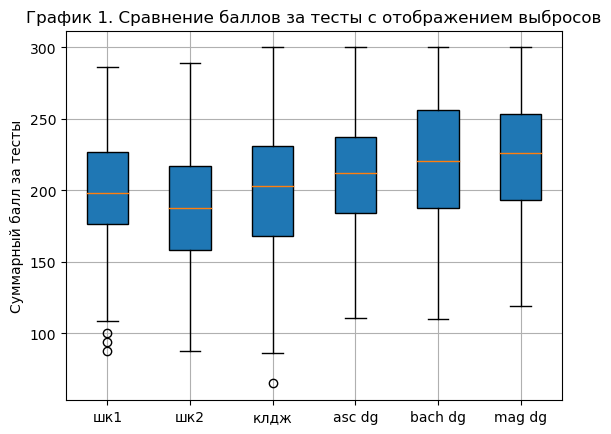

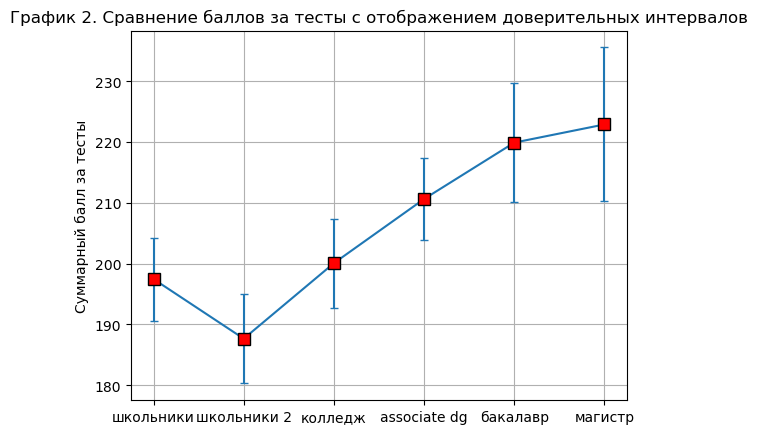

In [112]:
def visual(sample1, sample2,sample3,sample4,sample5,sample6):
    """
    checking the equality of the means in two samples
    """

    DF = \
        pd.DataFrame({'Выборка1': sample1,
                     'Выборка2': sample2,
                     'Выборка3': sample3,
                     'Выборка4': sample4,
                     'Выборка5': sample5,
                     'Выборка6': sample6}).agg(['mean'
            , 'std', 'count', 'sem']).transpose()
    DF.columns = ['Mx', 'SD', 'N', 'SE']
    K = stats.t.ppf(0.9916, DF['Mx'] - 1)
    DF['interval'] = K * DF['SE']
    DF
    a = plt.boxplot([sample1, sample2,sample3,sample4,sample5,sample6], vert=True, patch_artist=True,
                    labels=['шк1'
                    ,
                    'шк2'
                    ,
                    'клдж'
                    ,
                    'asc dg'
                    ,
                    'bach dg'
                    ,
                    'mag dg'
                    ])
    plt.title("График 1. Сравнение баллов за тесты с отображением выбросов")
    plt.ylabel("Суммарный балл за тесты")
    plt.grid()
    plt.show()
    b = plt.errorbar(
        x=['школьники'
           ,
           'школьники 2'
           ,
           'колледж'
           ,
           'associate dg'
           ,
           'бакалавр'
           ,
           'магистр'
           ],
        y=DF['Mx'],
        yerr=DF['interval'],
        capsize=3,
        mfc='red',
        mec='black',
        #fmt='o',
        label='График',
        marker="s",
        markersize=8
        )
    plt.title("График 2. Сравнение баллов за тесты с отображением доверительных интервалов")
    plt.ylabel("Суммарный балл за тесты")
    plt.grid()
    plt.show()

visual(highs,somes,col,assoc,bachd,magsd)

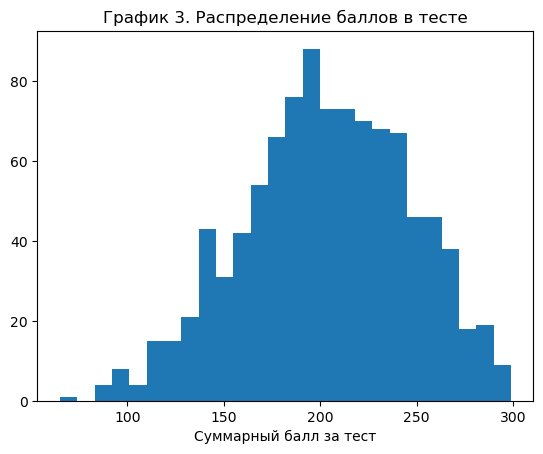

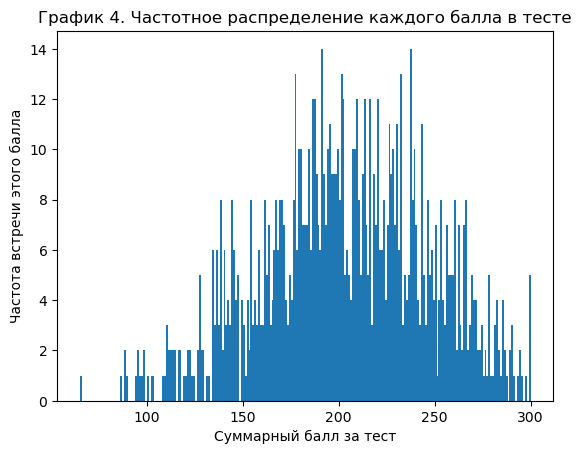

In [111]:
plt.title("График 3. Распределение баллов в тесте")
plt.xlabel("Суммарный балл за тест")
plt.hist(da['summa'], bins=np.arange(min(da['summa']), max(da['summa']) + 1, 9))
plt.show()
plt.title("График 4. Частотное распределение каждого балла в тесте")
plt.ylabel("Частота встречи этого балла")
plt.xlabel("Суммарный балл за тест")
plt.hist(da['summa'], bins=np.arange(min(da['summa']), max(da['summa']) + 1, 1))
plt.show()

7) <b>Выводы из графиков:</b>

1. Если посмотреть на график 1, то по количеству выбросов видно, что чаще всего склонны заваливать экзамены школьники
2. Самый большой размах у студентов колледжей (график 1)<p>
Если смотреть на график 2, то можно заметить значимые различия между группами:<p>
    3. Студентов высших учебных заведений и всех остальных(шруппа 5, 6 различна с группой 1,2,3)
    4. Студентов с образованием Associate degree  и some school(группа 2 и группа 4)<p>
        <i>P.S. Вроде как это верное сравнение, сделанное с помощью Критерия Тьюки, но я не уверен... Может это и неправильно, тем не менее, у представленных групп один доверительный интервал не пересекается с другим</i>
5.Точно существует большое различие между студентами всех групп, вплоть до 20 баллов из 300
6.Один из студентов набрал меньше 50 баллов, что довольно странно, стоит проверить данные на корректность

8) <b>Вывод :</b>

В результате проделанной работы <b>мы получили статистически значимые различия между успехом сдачей экзаменов людьми с разными уровнями образования

<b>Спасибо за внимание!</b>